In [11]:
import csv
import numpy as np
import pandas as pd

with open('./save/logs', 'r') as log_file:
    log_data = csv.reader(log_file)
    headers = next(log_data)

    rewards = []
    episodes = []
    ep_lengths = []
    ep_run_times = []
    avg_step_run_times = []
    q_loss = []
    p_loss = []
    
    for row in log_data:
        episodes.append(int(row[0]))
        rewards.append(float(row[1]))
        ep_lengths.append(int(row[3]))
        ep_run_times.append(float(row[4]))
        avg_step_run_times.append(float(row[5]))
        q_loss.append(float(row[6]))
        p_loss.append(float(row[7]))
        
rewards = np.array(rewards)
ep_lengths = np.array(ep_lengths)
ep_run_times = np.array(ep_run_times)
avg_step_run_times = np.array(avg_step_run_times)
q_loss = np.array(q_loss)
p_loss = np.array(p_loss)

In [12]:
headers

['episode',
 'rewards',
 'running_40_episode_reward',
 'episode_length',
 'epsiode_run_time',
 'average_step_run_time',
 'q_loss',
 'p_loss']

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

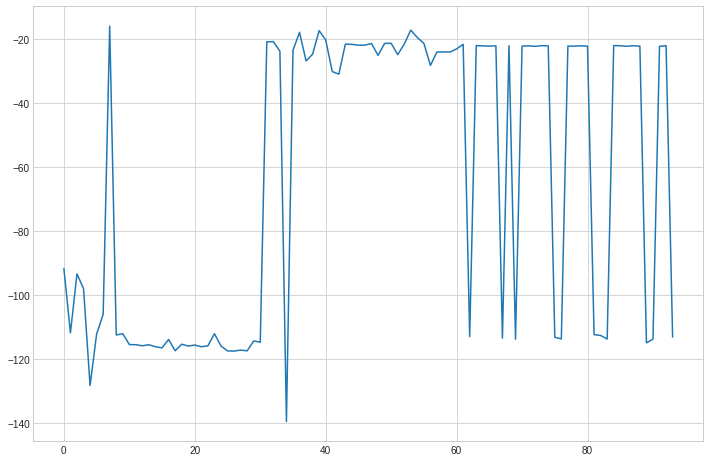

In [14]:
plt.plot(episodes[0:], rewards[0:])

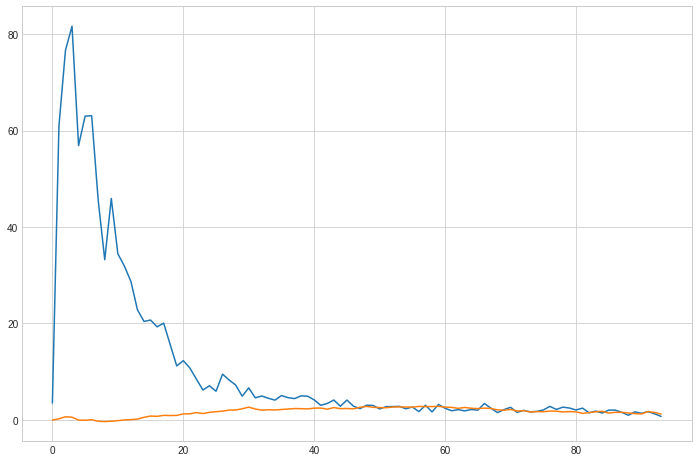

In [15]:
plt.plot(episodes[0:], q_loss[0:], p_loss[0:])

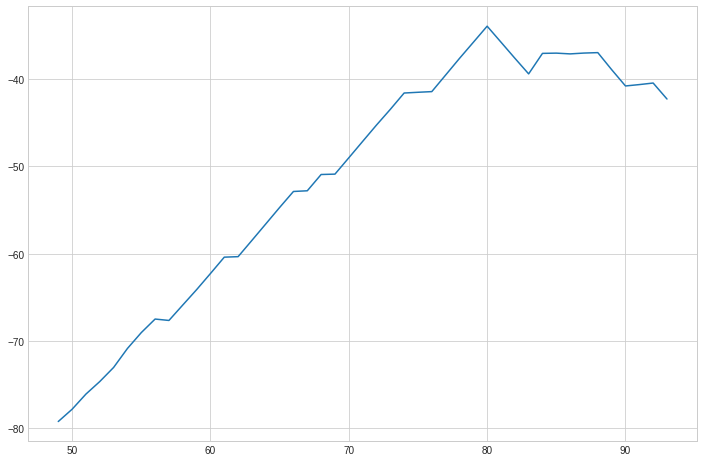

In [16]:
moving_avg = pd.DataFrame(rewards).rolling(50).mean()
moving_avg = moving_avg[moving_avg.notna()]
plt.plot(moving_avg)